In [77]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import random

In [78]:
def random_walk(target_step):
    start_position = 1 
    
    if target_step == 1: # Ensuring P(1) = 1, as this is our starting position
        return True
    if target_step == 0: # Ensuring P(0) = 0, as we cannot move backwards 
        return False    
    
    # Loop to keep tossing coin until we exceed our target 
    while start_position < target_step: 
        step = random.choice([1,2])
        start_position += step
        if start_position == target_step:
            return True
    return False   

In [79]:
# Creating an estimate for the probability of stepping on 25
target_step = 25
count = 0
num_simulations = 100000

landings = [random_walk(target_step) for _ in range(num_simulations)]

for success in landings:
    if success:
        count += 1 # Counting how many times we get to exactly 25 in our simulations

estimated_probability = count / num_simulations # Estimate P(25)

In [80]:
print(f'Estimated probability of landing on step {target_step} is {estimated_probability:.6f}')

Estimated probability of landing on step 25 is 0.667330


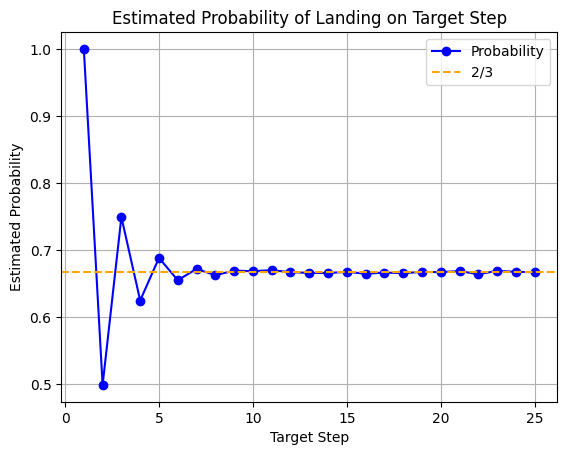

In [81]:
# Creating a plot for P(1) through to P(25)
target_steps = np.arange(1,26) 
probabilities = []

for target_step in target_steps:
    count = 0
    num_simulations = 100000
    landings = [random_walk(target_step) for _ in range(num_simulations)]
    for success in landings:
        if success:
            count += 1
    estimated_probability = count / num_simulations
    probabilities.append(estimated_probability)
    
plt.plot(target_steps, probabilities,color = 'b', marker='o', label  = 'Probability')
plt.xlabel('Target Step')
plt.ylabel('Estimated Probability')
plt.axhline(y = 2 / 3, color='orange', linestyle='--', label = '2/3') # Noticed estimated values seem to converge
plt.grid()
plt.legend()
plt.title('Estimated Probability of Landing on Target Step')
plt.show()

In [82]:
def step_number(N):
    a = 0 # Defining P(0) = 0
    b = 1 # Defining P(1) = 1
    
    # Ensuring P(0) = 0 and P(1) = 1 as the initial conditions for the recursion
    if N == 0:
        return a 
    elif N == 1:
        return b
    # Begin iterative process
    else:
        for i in range(2, N+1):
            p = decimal.Decimal(a + b) / decimal.Decimal(2) # decimal.Decimal() is used to increase the precision of the calculation
            a , b = b, p
        return p     

In [83]:
print(step_number(25))

0.666666686534881591796875


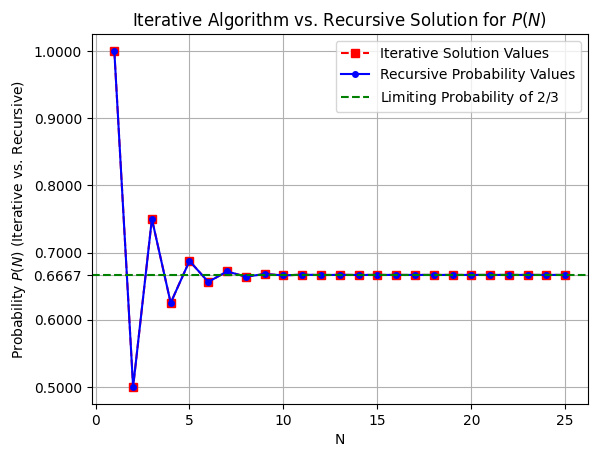

In [84]:
# Compute simulated values
y_values = [step_number(i) for i in range(1, 26)]
    
# Define y-axis ticks for probability clarity showing the theoretical limit of 2/3
ticks = [0.5, 0.6, 2/3 , 0.7, 0.8, 0.9, 1.0]
plt.yticks(ticks)  

plt.plot(range(1, 26), theoretical_values, 'r--', marker='s', markersize=6, label="Iterative Solution Values") 
plt.plot(range(1, 26), y_values, 'b-', marker='o', markersize=4, label="Recursive Probability Values")    
plt.axhline(y = 2 / 3, color='g', linestyle='--', label = r"Limiting Probability of $2/3$")
plt.xlabel('N')
plt.ylabel(r"Probability $P(N)$ (Iterative vs. Recursive)")
plt.legend()
plt.title(r"Iterative Algorithm vs. Recursive Solution for $P(N)$")
plt.grid()
plt.show()